<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - In-class Exam



---
#### Guidelines 
- This is your notebook for your in-class midterm exam. 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, if you do, your answers will be considered invalid = **0%**).
- The in-class exam is **10%** of your total midterm score.
- During the exam you can only have the following websites open in your browser:
    * [ECON-628-01 github][1]
    * ECON-628-01-yourgithubusersname 
    * [StackOverflow][2]  
- If we noticed that your computer browser has other websites open, you will be asked to **close your computer, leave the class, and will get an score of 0%**
- Remember: if you are using code from someone else/online (StackOverflow) you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
    


- Once you are done with your exam use this [link][3] to **submit** the GitHub link to your take home exam.
[1]:https://github.com/jrcmalunay/ECON628-01 "ECON-628-01 github"
[2]:http://stackoverflow.com "StackOverflow"
[3]: https://docs.google.com/forms/d/e/1FAIpQLSercXrXIky91taz98tPviIqA8C0FaQZ_WIfNoRYxMbV5wPtkg/viewform "link"

---



### Dataset 
This dataset comes from the Sleep and the allocation of time [paper][1] by Biddle, Jeff and Hamermesh, Daniel where using aggregated data for 12 countries, a cross section of microeconomic data, and a panel of households, they demonstrate that increases in time in the labor market reduce sleep!!!! The variables are:
https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents

| **Name**   |      **Description**     |  
|----------|:-------------:|
| age | in years | 
| black | =1 if black | 
| case | identifier | 
| clerical | =1 if clerical worker |
| construc | =1 if construction worker |
| educ | years of schooling|
| earns74 | total earnings, 1974 |
| gdhlth | =1 if in good or excellent health |
| inlf |  =1 if in labor force |
|leis1  |sleep - totwrk|
|leis2  |slpnaps - totwrk|
|leis3  |rlxall - totwrk|
| smsa |  =1 if living in SMSA |
| | SMSA is the Standard Metropolitan Statistical Area, an integrated economic and social unit having a large population nucleus. It is a good indicator of living in a city.|
|lhrwage| log hourly wage|
|lothinc | log othinc, unless othinc < 0
| male |  =1 if male |
| marr | =1 if married |
| prot | =1 if Protestant |
|rlxall |slpnaps + personal activs|
| selfe  | =1 if self employed|
| sleep | minutes sleep at night, per week |
| slpnaps | minutes sleep, including naps, per week |
| south |  =1 if live in south |
| spsepay |  spousal wage income |
| spwrk75 |  =1 if spouse works |
| totwrk | minutes worked per week |
| union |  =1 if belong to union |
| worknrm | minutes work main job |
| workscnd | minutes work second job |
|exper     | age - educ - 6 |
| yngkid | =1 if children less than 3 years present |
| yrsmarr | years married |
| hrwage | hourly wage |
|agesq   |age^2|


[1]:https://core.ac.uk/download/pdf/6820141.pdf "paper"


---


---

## The Scenario
---
The PI (principal investigator) of a project you are working for, claims that nowadays people sleep "more" because access to the internet and the mechanization of labor reduces their work time. Based on this assumption, he wants to implement a literacy program that requires participants to read 1 chapter of a book one hour before their bed time and one section of an introduction to mathematics book one hour before they leave their home for work.

**He asks you to find out if people are indeed sleeping more or not, before he implements the literacy program.** 
Assume that, you don't have any other dataset but the one from the Biddle and Hamermesh paper to answer this question. 
Use all the predictive methods, you consider neccesary to give  an answer to the PI, and make sure you explain the output of your predictive analysis.


---

### Basic package imports
---

In [3]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Read/load the dataset "sleep_bh.csv" and do an initial overview of the data
    Check the shape of your data
    Cheeck the type of values
    Identify which variables have missing values
    Print a list of the indices where there are missing values
---

In [8]:
df= pd.read_csv('../../datasets/sleep/sleep_bh.csv')
df.head(10) #obtaining overall feel of the data

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
5,41,0,6,0.0,0.0,12,0,1,1,4812,...,0,1205,0,0,1205,23,0,23,19.249998,1681
6,35,0,7,0.0,0.0,12,8250,1,1,4787,...,1,2113,0,2113,0,17,1,0,1.440000,1225
7,47,0,8,0.0,0.0,13,0,1,1,3544,...,0,3608,0,3608,0,28,0,24,15.010007,2209
8,32,0,9,0.0,0.0,17,18750,1,1,4359,...,0,2353,1,2353,0,9,0,11,4.329998,1024
9,30,0,10,0.0,0.0,15,11750,1,1,4211,...,1,2851,0,2851,0,9,0,7,2.959999,900


In [9]:
df.shape #obtaining number of rows and columns

(706, 34)

In [10]:
df.info() #checking types of label we have in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
age         706 non-null int64
black       706 non-null int64
case        706 non-null int64
clerical    706 non-null float64
construc    706 non-null float64
educ        706 non-null int64
earns74     706 non-null int64
gdhlth      706 non-null int64
inlf        706 non-null int64
leis1       706 non-null int64
leis2       706 non-null int64
leis3       706 non-null int64
smsa        706 non-null int64
lhrwage     532 non-null float64
lothinc     706 non-null float64
male        706 non-null int64
marr        706 non-null int64
prot        706 non-null int64
rlxall      706 non-null int64
selfe       706 non-null int64
sleep       706 non-null int64
slpnaps     706 non-null int64
south       706 non-null int64
spsepay     706 non-null int64
spwrk75     706 non-null int64
totwrk      706 non-null int64
union       706 non-null int64
worknrm     706 non-null int64
workscnd    706 non

In [11]:
df.describe()
#You can see the hrwage or hourly wage has missing values marked as NaN. 
#however this value does not show log hourly wage.

/Users/KiraEvsanaa/anaconda/envs/econ/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,...,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,532.000000,706.000000
mean,38.815864,0.049575,353.500000,0.182331,0.030075,12.780453,9767.705382,0.890935,0.753541,4690.723796,...,0.480170,2122.920680,0.218130,2093.252125,29.668555,20.035411,0.128895,11.769122,5.082839,1635.144476
std,11.342637,0.217219,203.948932,0.335413,0.148366,2.784702,9323.588151,0.311942,0.431254,908.049561,...,0.499961,947.470123,0.413269,945.301457,148.834262,12.377520,0.335321,11.591227,3.704385,950.102976
min,23.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1745.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000,529.000000
25%,29.000000,0.000000,177.250000,0.000000,0.000000,12.000000,2500.000000,1.000000,1.000000,4109.750000,...,0.000000,1553.500000,0.000000,1538.000000,0.000000,10.000000,0.000000,0.000000,NaN,841.000000
50%,36.000000,0.000000,353.500000,0.000000,0.000000,12.000000,8250.000000,1.000000,1.000000,4620.000000,...,0.000000,2288.000000,0.000000,2275.000000,0.000000,17.000000,0.000000,9.000000,NaN,1296.000000
75%,48.000000,0.000000,529.750000,0.182331,0.030075,16.000000,13750.000000,1.000000,1.000000,5203.750000,...,1.000000,2691.750000,0.000000,2635.500000,0.000000,30.000000,0.000000,20.000000,NaN,2304.000000
max,65.000000,1.000000,706.000000,1.000000,1.000000,17.000000,42500.000000,1.000000,1.000000,7417.000000,...,1.000000,6415.000000,1.000000,6415.000000,1337.000000,55.000000,1.000000,43.000000,35.509987,4225.000000


In [12]:
df.isnull().sum()
#this just confirms the previous result from description statistics. Hourly wage and log hourly wage has missing values. 

age           0
black         0
case          0
clerical      0
construc      0
educ          0
earns74       0
gdhlth        0
inlf          0
leis1         0
leis2         0
leis3         0
smsa          0
lhrwage     174
lothinc       0
male          0
marr          0
prot          0
rlxall        0
selfe         0
sleep         0
slpnaps       0
south         0
spsepay       0
spwrk75       0
totwrk        0
union         0
worknrm       0
workscnd      0
exper         0
yngkid        0
yrsmarr       0
hrwage      174
agesq         0
dtype: int64

## 2. Drop missing values (not the best practice), but OK for exam 
    Once you drop the missing values, check that the list of binary variables have values of 1 an 0
        Note: at this point the inlf predictor/variable should have the value of 1
---

In [13]:
#hourly wage and log hourly wage is being dropped. This should result in 0 missing values. 
df.drop(['hrwage','lhrwage',], axis=1, inplace=True)
df.isnull().sum()

age         0
black       0
case        0
clerical    0
construc    0
educ        0
earns74     0
gdhlth      0
inlf        0
leis1       0
leis2       0
leis3       0
smsa        0
lothinc     0
male        0
marr        0
prot        0
rlxall      0
selfe       0
sleep       0
slpnaps     0
south       0
spsepay     0
spwrk75     0
totwrk      0
union       0
worknrm     0
workscnd    0
exper       0
yngkid      0
yrsmarr     0
agesq       0
dtype: int64

In [21]:
#showing the list binary variables
df1 = pd.get_dummies(df)
df1

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spsepay,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,0,3438,0,3438,0,14,0,13,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,0,5020,0,5020,0,11,0,0,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,20000,1,2815,0,2815,0,21,0,0,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,5000,1,3786,0,3786,0,12,0,12,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,2400,1,2580,0,2580,0,44,0,33,4096
5,41,0,6,0.000000,0.000000,12,0,1,1,4812,...,0,0,1205,0,0,1205,23,0,23,1681
6,35,0,7,0.000000,0.000000,12,8250,1,1,4787,...,12000,1,2113,0,2113,0,17,1,0,1225
7,47,0,8,0.000000,0.000000,13,0,1,1,3544,...,0,0,3608,0,3608,0,28,0,24,2209
8,32,0,9,0.000000,0.000000,17,18750,1,1,4359,...,0,0,2353,1,2353,0,9,0,11,1024
9,30,0,10,0.000000,0.000000,15,11750,1,1,4211,...,6000,1,2851,0,2851,0,9,0,7,900


In [26]:
print df1['spwrk75'].value_counts(),

0    367
1    339
Name: spwrk75, dtype: int64


In [27]:
print df1['black'].value_counts(),

0    671
1     35
Name: black, dtype: int64


In [28]:
print df1['gdhlth'].value_counts(),

1    629
0     77
Name: gdhlth, dtype: int64


In [29]:
print df1['inlf'].value_counts(),

1    532
0    174
Name: inlf, dtype: int64


In [31]:
print df1['union'].value_counts(),

0    552
1    154
Name: union, dtype: int64


In [33]:
print df1['yngkid'].value_counts(),

0    615
1     91
Name: yngkid, dtype: int64


## 3. Check for correlations
    Implement a correlation heatmap
---

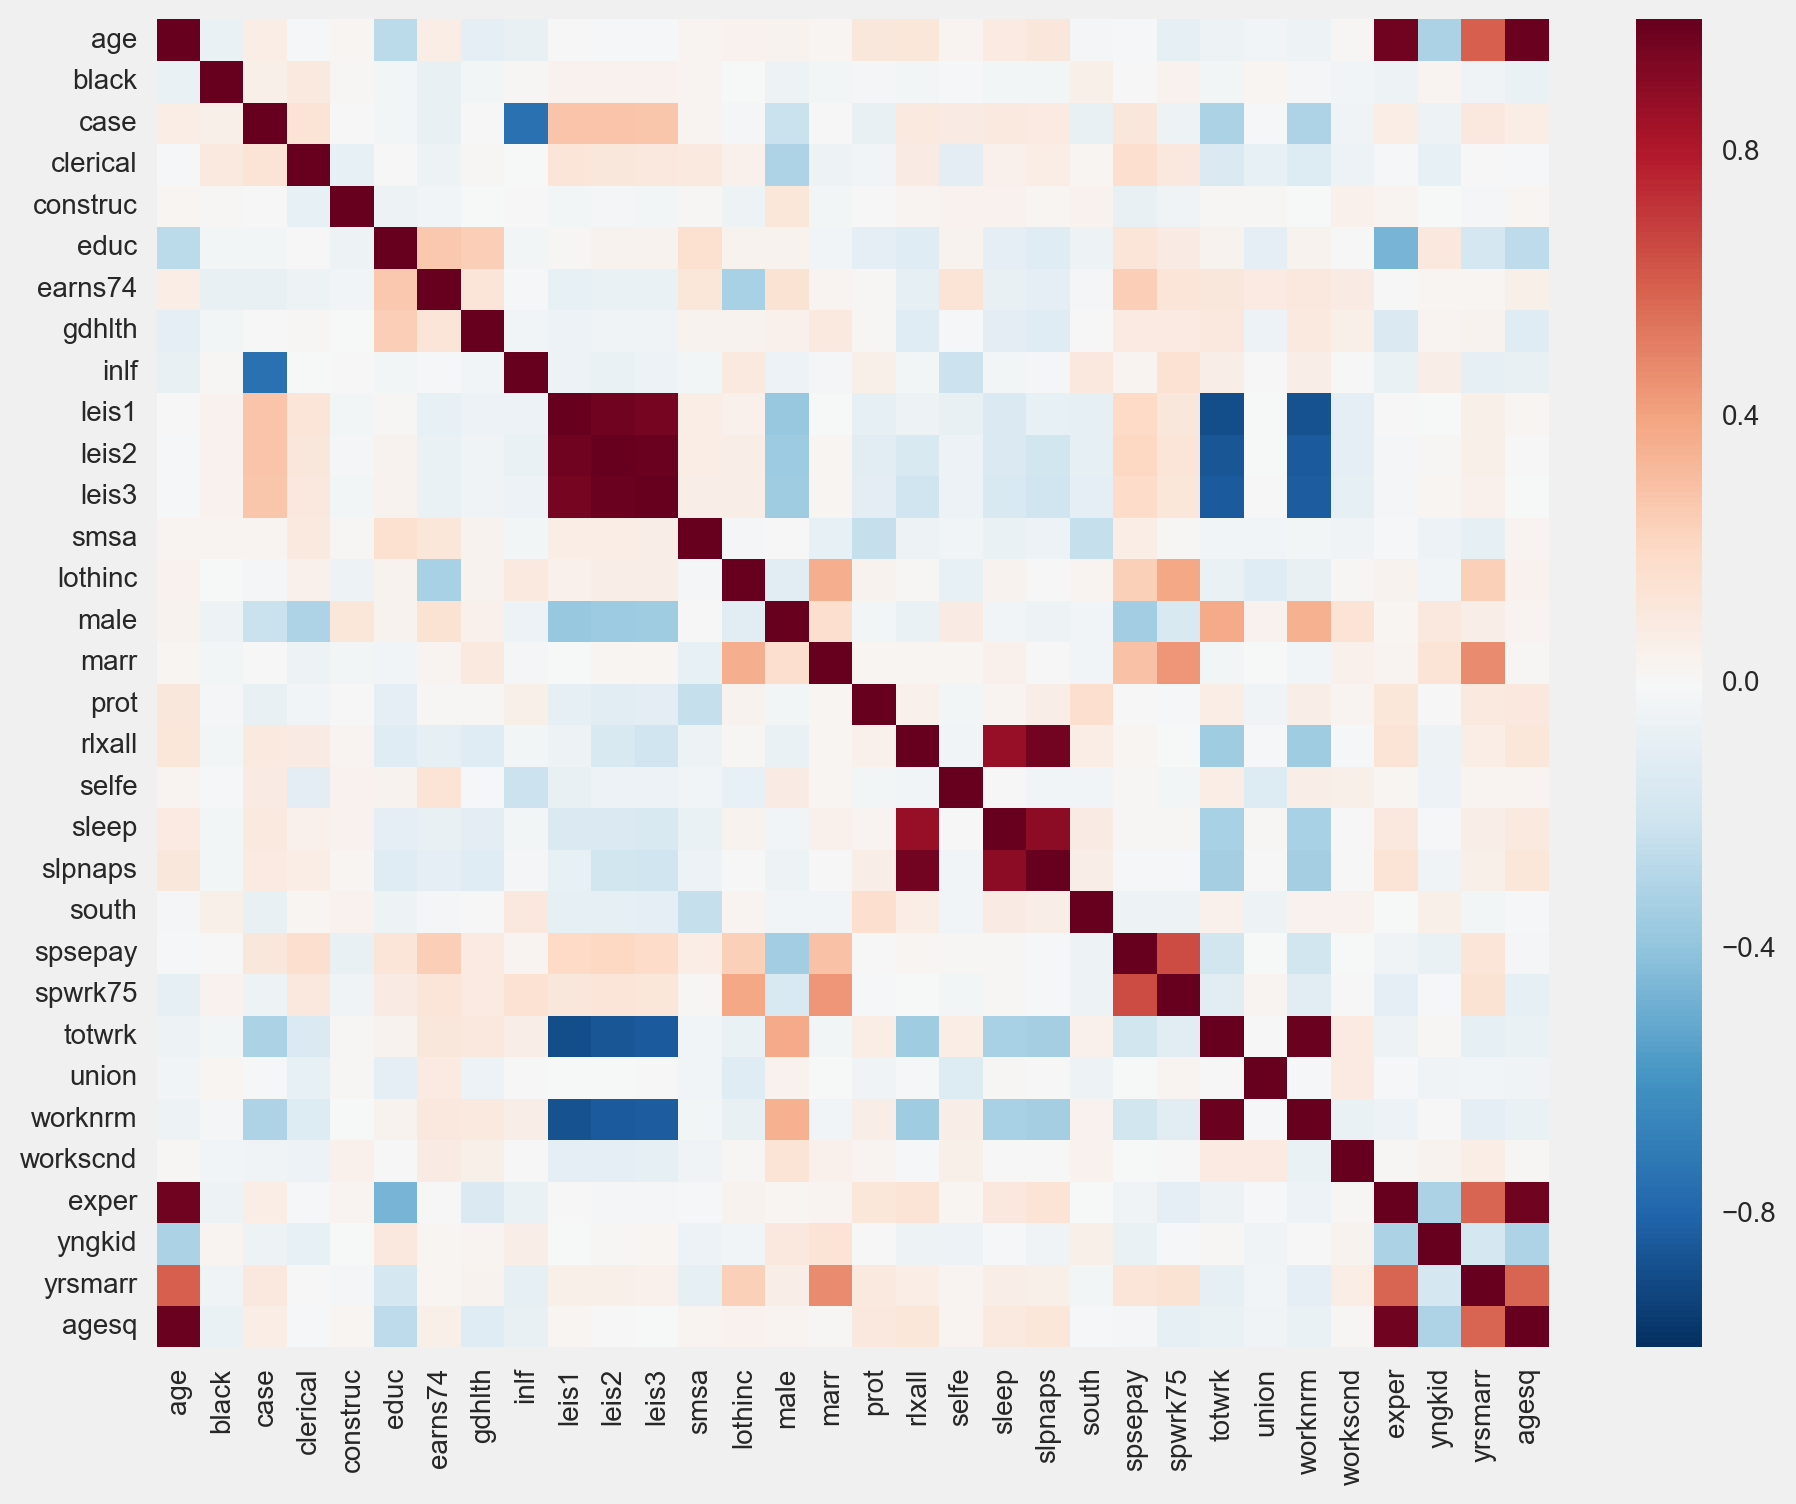

In [20]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(df.corr(), ax=ax)
plt.show()

## 4.1 Predictions
    Define y (mins sleep at night, per week)
    Define X (where X are your predictors => make sure to include the correct variables, i.e. exclude y, case, lothinc, and **other** variables)
    Standarized your Xs
    Train test split:
        splits your data into train test, 
        assigns a size of 30% to your test set, and use random_state=10
        print the shape of your train (X, y) and test (X, y)
---

In [36]:
df.isnull().sum()
#obtaining labels so I don't have to scroll up and down. 

age         0
black       0
case        0
clerical    0
construc    0
educ        0
earns74     0
gdhlth      0
inlf        0
leis1       0
leis2       0
leis3       0
smsa        0
lothinc     0
male        0
marr        0
prot        0
rlxall      0
selfe       0
sleep       0
slpnaps     0
south       0
spsepay     0
spwrk75     0
totwrk      0
union       0
worknrm     0
workscnd    0
exper       0
yngkid      0
yrsmarr     0
agesq       0
dtype: int64

In [38]:
#Defining a function
#y is mins sleep at night/week and x is everything but class. This is splitting x and y. 
y = df['sleep'] 
columns_ = df.columns.tolist()
exclude_col = ['sleep', 'lothinc', 'case'] 

X = df[[i for i in columns_ if i not in exclude_col]]

print X.shape, y.shape

(706, 29) (706,)


In [40]:
#Standardizing X's. Since we are standardizing, I am assuming that we are doing regularization. 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() 

Xn = ss.fit_transform(X)

In [41]:
#Data splitting 
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape
#The shape looks the same. 

(494, 29) (494,)
(212, 29) (212,)


## 4.2 Machine Learning models 
    OLS, Regularization methods and evaluate the performance of your models on the train and test datasets
    Cross validate at least 10 times the R^2 scores of your models and print the average R^2 scores 
    For the OLS implement an scatter plot that shows the relation between your predicted values and the y_test values (the actual values)
    
---

In [106]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    lr = LinearRegression()
    ytrain_pred = lr.predict(X_train)
    ytest_pred = lr.predict(X_test)

linreg_scores = cross_val_score(lr, X_train, y_train, cv=10)

print linreg_scores
print "Average R^2 OLS score: %.3f" % (np.mean(linreg_scores))
#Unbelievable. R2 is perfect. 

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Average R^2 OLS score: 1.000


In [109]:
#Cross checking to see if R^2 will be different
def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [110]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "OLS", lr)

MSE OLS train data: 0.00, test data: 0.00
R^2 OLS train data: 1.00, test data: 1.00


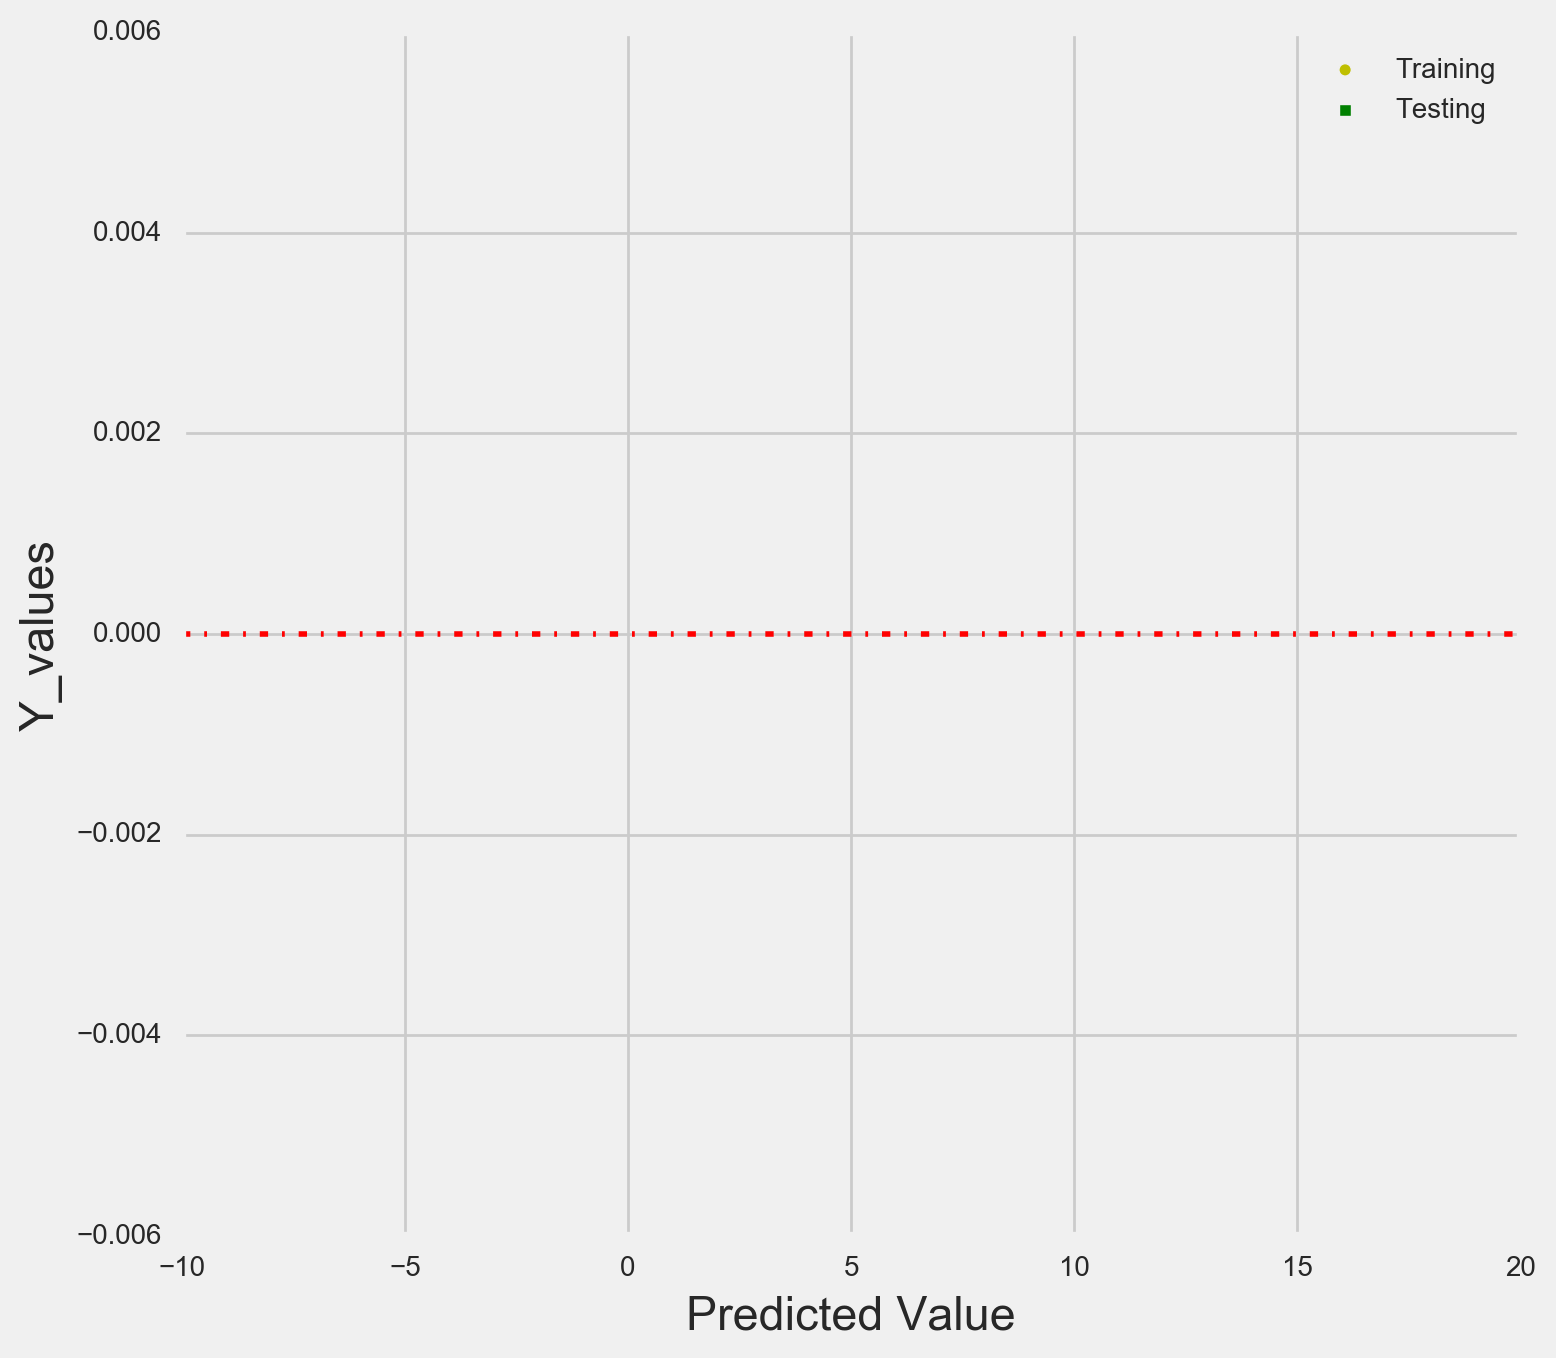

In [52]:
fig = plt.figure(figsize=(8,7))

plt.scatter(ytrain_pred,  ytrain_pred - y_train,
            c='y', marker='o', label='Training')

plt.scatter(ytest_pred,  ytest_pred - y_test,
            c='g', marker='s', label='Testing')

plt.xlabel('Predicted Value')
plt.ylabel('Y_values')
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=-10, xmax=20, lw=2, linestyles= '-.', color='red')
plt.xlim([-10, 20])
plt.tight_layout()

plt.show()
#The graph doesn't tell me anything. Will run other tests to see if the model is overfit. 

## 4.2.1 OLS
    
---

In [53]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE - OLS train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, ytrain_pred),
        mean_squared_error(y_test, ytest_pred)))
print('R^2 0LS train: %.3f, test: %.3f' % (
        r2_score(y_train, ytrain_pred),
        r2_score(y_test, ytest_pred)))

#this model is completely perfect. At this point I am not sure if the model I am testing is even correct. 

MSE - OLS train: 0.000, test: 0.000
R^2 0LS train: 1.000, test: 1.000


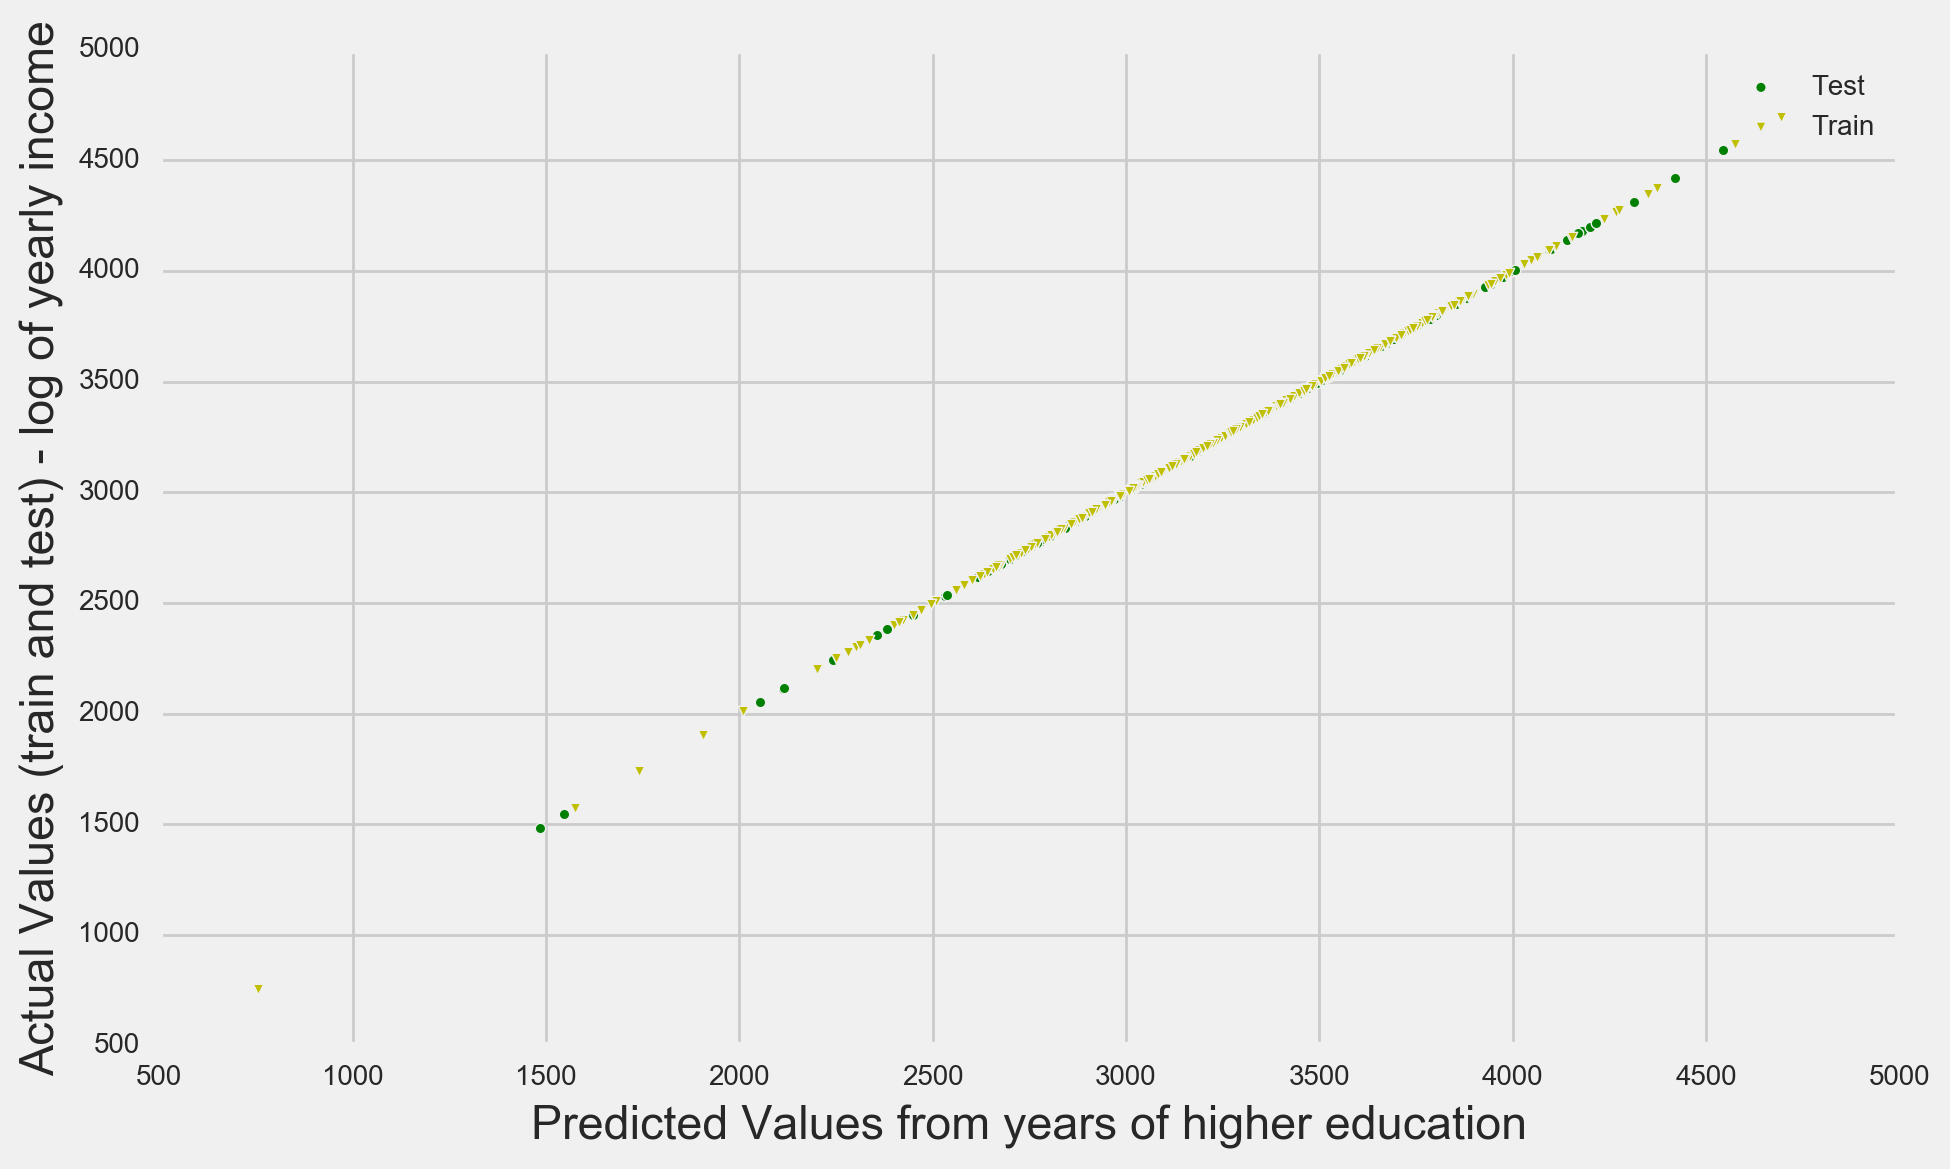

In [54]:
fig = plt.figure(figsize=(10,6))
plt.scatter(ytest_pred, y_test, s=14, c='g', marker='o', label='Test')
plt.scatter(ytrain_pred, y_train, s=14, c='y', marker='v', label='Train')
plt.xlabel("Predicted Values from years of higher education")
plt.ylabel("Actual Values (train and test) - log of yearly income")
plt.legend(loc='upper right')
plt.show()

## 4.2.2 Regularization
    
---

In [55]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [57]:
ridge_alphas = np.logspace(0, 5, 200)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)

1.0


In [59]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge.fit(X_train, y_train)
ytrain_pred_ridge = ridge.predict(X_train)
ytest_pred_ridge = ridge.predict(X_test)

ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)

print('MSE - Ridge train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, ytrain_pred_ridge),
        mean_squared_error(y_test, ytest_pred_ridge)))
print('R^2 - Ridge train: %.3f, test: %.3f' % (
        r2_score(y_train, ytrain_pred_ridge),
        r2_score(y_test, ytest_pred_ridge)))
#The below result is same as OLS

MSE - Ridge train: 0.000, test: 0.000
R^2 - Ridge train: 1.000, test: 1.000


In [61]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

326.169774132


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [65]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [67]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso.fit(X_train, y_train)
ytrain_pred_lasso = lasso.predict(X_train)
ytest_pred_lasso = lasso.predict(X_test)

lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)
print lasso_scores
print "Average R^2 Lasso score: %.3f" % (np.mean(lasso_scores))

[ 0.99997126  0.99990828  0.99996166  0.99997489  0.99996882  0.99997253
  0.99996896  0.9999775   0.99996593  0.99997957]
Average R^2 Lasso score: 1.000


In [69]:
print('MSE - Lasso train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, ytrain_pred_lasso),
        mean_squared_error(y_test, ytest_pred_lasso)))
print('R^2 - Lasso train: %.3f, test: %.3f' % (
        r2_score(y_train, ytrain_pred_lasso),
        r2_score(y_test, ytest_pred_lasso)))

MSE - Lasso train: 5.770, test: 6.249
R^2 - Lasso train: 1.000, test: 1.000


In [73]:
l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5,
                            verbose=1)
optimal_enet.fit(X_train, y_train)

print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

326.169774132
1.0


.........................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   11.2s finished


In [74]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet.fit(X_train, y_train)

ytrain_pred_enet = enet.predict(X_train)
ytest_pred_enet = enet.predict(X_test)

enet_scores = cross_val_score(enet, X_train, y_train, cv=10)
print('MSE - ElasticNet train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, ytrain_pred_enet),
        mean_squared_error(y_test, ytest_pred_enet)))
print('R^2 - ElasticNet train: %.3f, test: %.3f' % (
        r2_score(y_train, ytrain_pred_enet),
        r2_score(y_test, ytest_pred_enet)))

MSE - ElasticNet train: 5.770, test: 6.249
R^2 - ElasticNet train: 1.000, test: 1.000


In [ ]:
#In this case either OLS or Ridge will do. With Lasso and Elastic Net, our MSE is higher and R^2 is at 1.00

## 4.2.3 What are the features that are the best predictors of mins sleep at night, per week
    What are the features with coefficients greater than 0
---

In [71]:
df.head(10) #obtaining name of the features here

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spsepay,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,0,3438,0,3438,0,14,0,13,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,0,5020,0,5020,0,11,0,0,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,20000,1,2815,0,2815,0,21,0,0,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,5000,1,3786,0,3786,0,12,0,12,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,2400,1,2580,0,2580,0,44,0,33,4096
5,41,0,6,0.0,0.0,12,0,1,1,4812,...,0,0,1205,0,0,1205,23,0,23,1681
6,35,0,7,0.0,0.0,12,8250,1,1,4787,...,12000,1,2113,0,2113,0,17,1,0,1225
7,47,0,8,0.0,0.0,13,0,1,1,3544,...,0,0,3608,0,3608,0,28,0,24,2209
8,32,0,9,0.0,0.0,17,18750,1,1,4359,...,0,0,2353,1,2353,0,9,0,11,1024
9,30,0,10,0.0,0.0,15,11750,1,1,4211,...,6000,1,2851,0,2851,0,9,0,7,900


In [93]:
def best_method(X, best_regulari):
    method_coefs = pd.DataFrame({'variable':X.columns, 
                                 'coef':best_regulari.coef_, 
                                 'abs_coef':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    '''you can change the number inside head to display more or less variables'''
    return method_coefs.head(10)

In [94]:
best_method(X, lasso)
#In this case it is slpnaps, leisure 2&3, and rlxall

,abs_coef,coef,variable
8,0.988436,-0.988436,leis1
17,0.491381,0.491381,slpnaps
9,0.479861,0.479861,leis2
21,0.361190,-0.361190,totwrk
10,0.147269,0.147269,leis3
15,0.143928,0.143928,rlxall
19,0.000020,0.000020,spsepay
5,0.000003,-0.000003,earns74
20,0.000000,0.000000,spwrk75
22,0.000000,0.000000,union


In [95]:
best_method(X, ridge)
#Everything but leisure1, total work, worknrm, and workscnd

,abs_coef,coef,variable
8,1.000000,-1.000000,leis1
21,0.400000,-0.400000,totwrk
23,0.200000,-0.200000,worknrm
24,0.200000,-0.200000,workscnd
17,0.200000,0.200000,slpnaps
15,0.200000,0.200000,rlxall
10,0.200000,0.200000,leis3
9,0.200000,0.200000,leis2
3,0.000006,0.000006,construc
13,0.000005,0.000005,marr


In [96]:
best_method(X, lr)
#Coef>0 are sleepnaps, leisure3&2, rlxall, clack and construction

,abs_coef,coef,variable
8,1.000000e+00,-1.000000e+00,leis1
21,4.000000e-01,-4.000000e-01,totwrk
23,2.000000e-01,-2.000000e-01,worknrm
17,2.000000e-01,2.000000e-01,slpnaps
10,2.000000e-01,2.000000e-01,leis3
15,2.000000e-01,2.000000e-01,rlxall
9,2.000000e-01,2.000000e-01,leis2
24,2.000000e-01,-2.000000e-01,workscnd
1,1.410955e-12,1.410955e-12,black
3,6.902178e-13,6.902178e-13,construc


In [97]:
best_method(X, enet)
#Coef>0 is leisure1, slpnaps, leisure2&3, & spsepay. 

,abs_coef,coef,variable
8,0.988436,-0.988436,leis1
17,0.491381,0.491381,slpnaps
9,0.479861,0.479861,leis2
21,0.361190,-0.361190,totwrk
10,0.147269,0.147269,leis3
15,0.143928,0.143928,rlxall
19,0.000020,0.000020,spsepay
5,0.000003,-0.000003,earns74
20,0.000000,0.000000,spwrk75
22,0.000000,0.000000,union


## 4.2.3.1 Bonus
    Define a function that creates and prints the distribution of residuals on the train and test data from all the methods
---

## 4.2.4 Regression Tree 
    Gridsearch your tree
    Print the best parameters and best score from your gridsearch.
    Evaluate the performance of your tree
    Print the features that best explain your Y, are these features the same as the features you found before from the regularization methods or OLS
    
    OPTIONAL: Visualize the tree ONLY if your computer lets you do it. Your grade won't be penalized for not printing the tree, nor you will receive extra points for visualization the tree
---

In [83]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=10, verbose=1)

In [85]:
dtr_gs.fit(X_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done 472 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    4.2s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [86]:
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=5,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 5, 'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 10}


best score 0.776572258582


In [91]:
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance

In [92]:
feature_importance(X, dtr_best)
#Sleep naps are the most important feature

,feature,importance
17,slpnaps,0.897252
15,rlxall,0.069732
8,leis1,0.011595
10,leis3,0.005259
5,earns74,0.004263
0,age,0.003086
27,yrsmarr,0.003077
18,south,0.002129
25,exper,0.001675
21,totwrk,0.000906


In [111]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

MSE Regression tree train data: 23089.98, test data: 51228.20
R^2 Regression tree train data: 0.88, test data: 0.77


## 4.2.5 Random Forest Regression Tree
    Make sure you gridsearch your Random Forest
    Evaluate the performance
    Print the features that best explain mins sleep at night, per week 
---



In [99]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=10,verbose=1)

estimator_rfr.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   28.5s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [100]:
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=7, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'min_samples_split': 3, 'max_leaf_nodes': 7, 'n_estimators': 100, 'max_depth': 5}


best score 0.814989518156


In [101]:
feature_importance(X, rfr_best)
# You can see that sleep naps are the still at higher importance level as previously mentioned in other importance table. 

,feature,importance
17,slpnaps,0.932577
15,rlxall,0.060192
28,agesq,0.001840
8,leis1,0.001275
25,exper,0.001108
24,workscnd,0.000589
13,marr,0.000552
7,inlf,0.000440
19,spsepay,0.000408
3,construc,0.000345


In [112]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 25293.88, test data: 37971.47
R^2 Random Forest Regression tree train data: 0.87, test data: 0.83


## 5. Based on the MSE and R^2, in your opinion which model perform best and why?
---

Based on the MSE and R^2 given previously. OLS and Ridge provides a better model because R^2=1 and MSE is both at 0 for both model. Whereas Regression Tree and Random Forest show unusually high MSE compared to OLS and Ridge. 

## 6. Was there any trade off between bias and variance whem implementing the models?
    
---

Although OLS and Ridge showed near perfect model explanation, this could mean that my model was overfitted. The purpose of using Lasso and Ridge is to take care multicollinearity and avoid overfitting model by introducing additional bias (B coefficient with Lambda). I did not necessarily notice underfitting here so therefore my model did not suffer from high bias but could've suffered from high variance. So yes, there was a tradeoff between variance and bias. 

## 7. Explain the Bias Variance trade in the model you selected?
    
---

My model could've sufferenf from high variance because my features explained Y at 100%. This usually means that the model must've been overfit. This could've been caused by redundant number of features I had in the model. To deal with overfitting, I could test for any outlier in the model could drop those outliers and re-test the model so see if there is any change in the model. 
For my model OLS or Ridge was the most appropriate model. OLS is prone to multicollineaity and heteroskedasticy while Ridge can take care of any multicollinearity. I would rely on Ridge model because it introduces extra Beta^2 to balance the bias. 